# Data Reconciliation example and some distributions for TEP4285

### imports 

In [2]:
import scipy.stats as sts #distributions
import numpy as np 
import matplotlib.pyplot as plt #plotting
import random #for bootstrapping

from tqdm.notebook import tqdm #progress bar


#### visualizing the twins distribution

In [3]:
life = np.linspace(15,60, 1000)

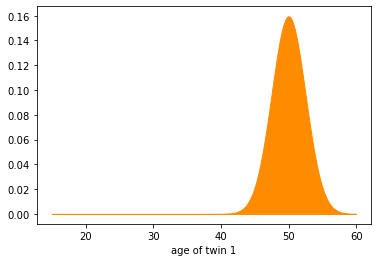

In [4]:
twin1 = sts.norm.pdf(life, loc = 50, scale = 2.5)
plt.figure()
plt.fill_between(life, twin1, [0 for i in range(1000)], color = 'darkorange')
#n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('age of twin 1')
plt.show()

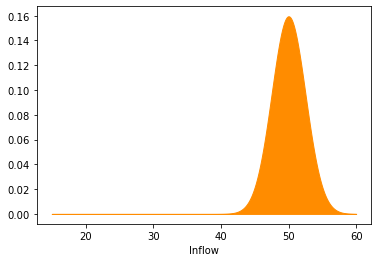

In [5]:
inflow = sts.norm.pdf(life, loc = 50, scale = 2.5)
plt.figure()
plt.fill_between(life, inflow, [0 for i in range(1000)], color = 'darkorange')
#n, bins, patches = plt.hist(twin1, color = 'darkorange', bins = 'auto')
plt.xlabel('Inflow')
plt.show()

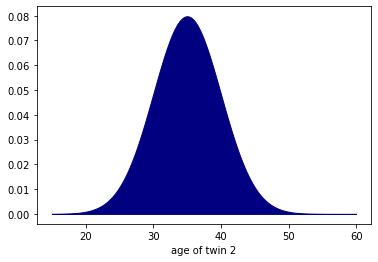

In [6]:
twin2 = sts.norm.pdf(life, loc = 35, scale = 5)
plt.figure()
plt.fill_between(life, twin2, [0 for i in range(1000)], color = 'navy')
plt.xlabel('age of twin 2')
plt.show()

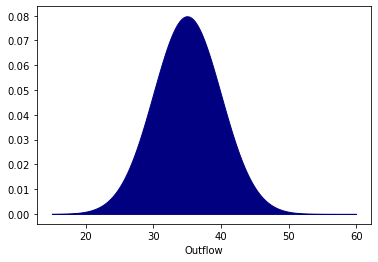

In [7]:
outflow = sts.norm.pdf(life, loc = 35, scale = 5)
plt.figure()
plt.fill_between(life, outflow, [0 for i in range(1000)], color = 'navy')
plt.xlabel('Outflow')
plt.show()

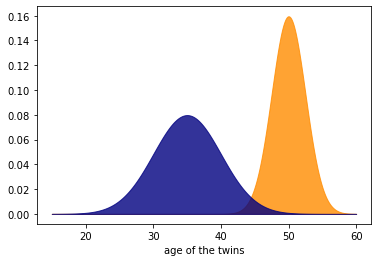

In [8]:
plt.figure()
plt.fill_between(life, twin1, [0 for i in range(1000)], color = 'darkorange', alpha = 0.8)
plt.fill_between(life, twin2, [0 for i in range(1000)], color = 'navy',alpha = 0.8)
plt.xlabel('age of the twins')
plt.show()

#### Monte Carlo (brute force) data reconciliation

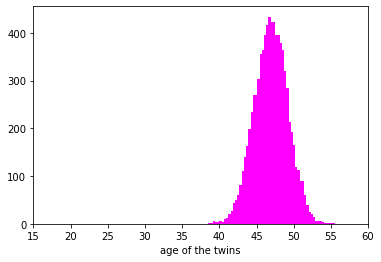

In [13]:
samplesize = 10*10**5
twin1 = sts.norm.rvs(loc = 50, scale = 2.5, size = samplesize)
twin2 = sts.norm.rvs(loc = 35, scale = 5, size = samplesize)

reconciled = []
for t1, t2 in zip(twin1, twin2):
    if abs(t1-t2) < 1:
        reconciled.append(t1)
        reconciled.append(t2)

plt.figure()
n, bins, patches = plt.hist(reconciled, color = 'fuchsia', bins = 'auto',)
plt.xlabel('age of the twins')
plt.xlim(15,60)
plt.show()


##### statistics of reconciled flow

In [10]:
print(f' the new mean value is {np.round(np.mean(reconciled),2)} with a standard deviation of {np.round(np.std(reconciled),2)}.')

 the new mean value is 46.95 with a standard deviation of 2.27.
